In [85]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [86]:
gstock_data = pd.read_csv('AAL.csv')
gstock_data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,27-09-2005,19.100000,21.049999,961200,21.400000,19.299999,18.194908
1,28-09-2005,19.200001,19.299999,5747900,20.530001,20.500000,19.326199
2,29-09-2005,20.100000,20.400000,1078200,20.580000,20.209999,19.052801
3,30-09-2005,20.180000,20.260000,3123300,21.049999,21.010000,19.806993
4,03-10-2005,20.900000,20.900000,1057900,21.750000,21.500000,20.268942


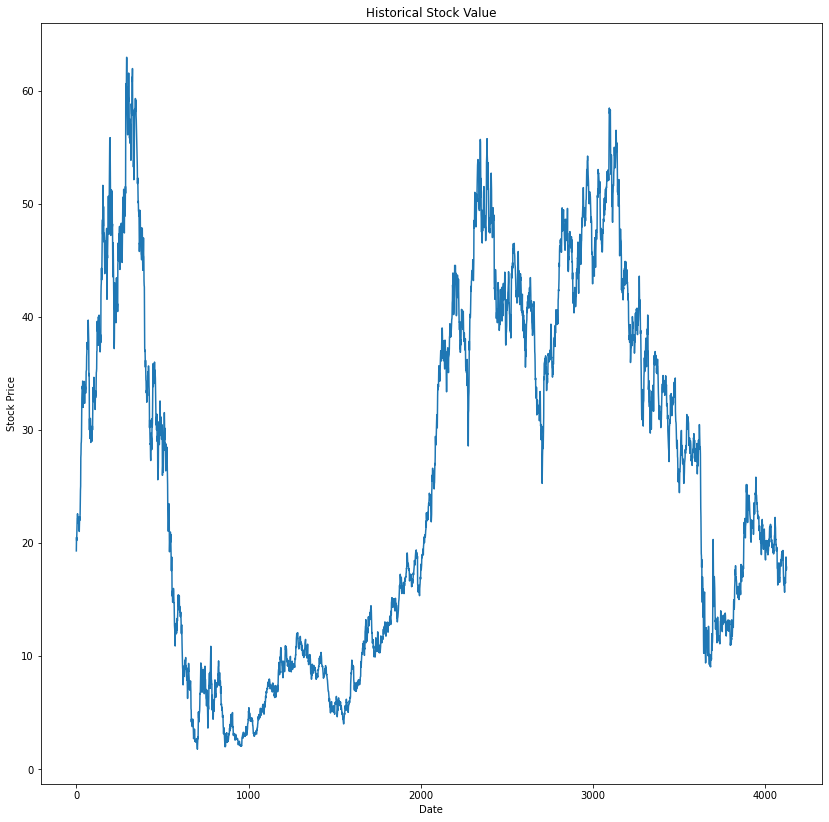

In [87]:
plt.figure(figsize=(14,14))
plt.plot(gstock_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [88]:
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = gstock_data['Date']
data2['Open'] = gstock_data['Open']
data2['High'] = gstock_data['High']
data2['Low'] = gstock_data['Low']
data2['Close'] = gstock_data['Close']
train, test = train_test_split(data2, test_size=0.5)

In [89]:
train_set = train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [90]:
#dropout layer improves accuracy
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [91]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 11s 108ms/step - loss: 0.0908
Epoch 2/15
45/45 [==============================] - 5s 106ms/step - loss: 0.0741
Epoch 3/15
45/45 [==============================] - 5s 107ms/step - loss: 0.0757
Epoch 4/15
45/45 [==============================] - 5s 107ms/step - loss: 0.0743
Epoch 5/15
45/45 [==============================] - 5s 106ms/step - loss: 0.0745
Epoch 6/15
45/45 [==============================] - 5s 106ms/step - loss: 0.0744
Epoch 7/15
45/45 [==============================] - 5s 106ms/step - loss: 0.0740
Epoch 8/15
45/45 [==============================] - 5s 107ms/step - loss: 0.0746
Epoch 9/15
45/45 [==============================] - 5s 105ms/step - loss: 0.0742
Epoch 10/15
45/45 [==============================] - 5s 105ms/step - loss: 0.0737
Epoch 11/15
45/45 [==============================] - 5s 108ms/step - loss: 0.0735
Epoch 12/15
45/45 [==============================] - 5s 107ms/step - loss: 0.0732
Epoch 13/15
45/45 [=====

In [97]:
real_stock_price = test.iloc[:, 1:2].values
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [98]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [101]:
len(real_stock_price)

2063

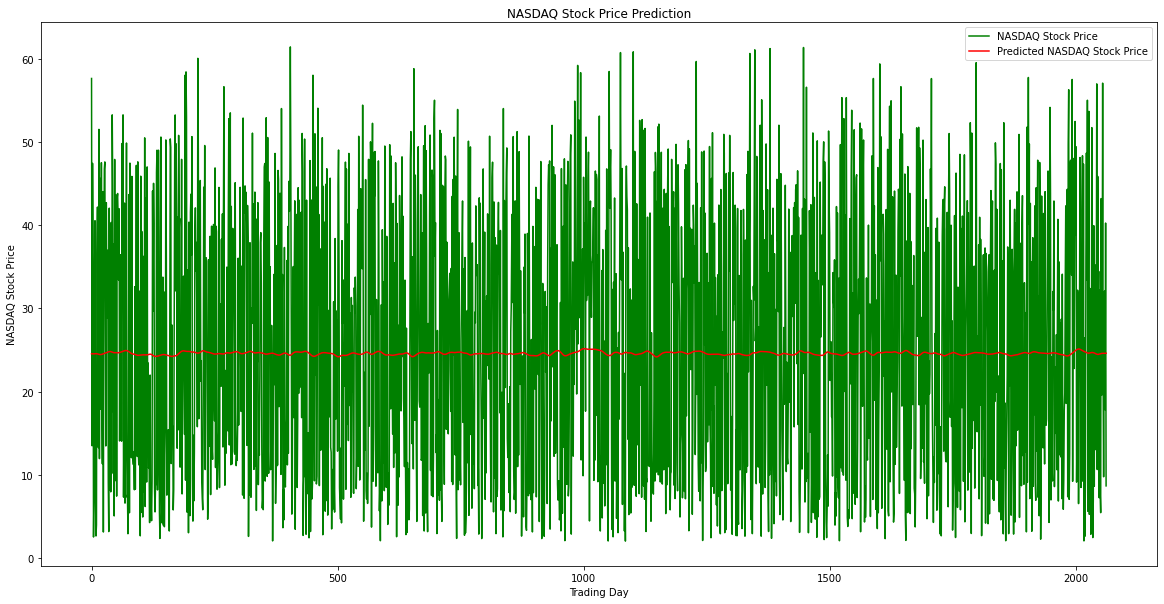

In [102]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'NASDAQ Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted NASDAQ Stock Price')
plt.title('NASDAQ Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('NASDAQ Stock Price')
plt.legend()
plt.show()